# Analyse des avis clients Amazon – Catégorie Beauté

In [5]:
import json
import gzip
import os


fichier = "All_Beauty.jsonl.gz"


print("📁 Fichiers dans le dossier :", os.listdir())

try:
   
    with gzip.open(fichier, "rt", encoding="utf-8") as f:
        lignes = f.readlines()

   
    donnees = [json.loads(ligne) for ligne in lignes]

    # Afficher les 3 premières entrées
    for i, item in enumerate(donnees[:3]):
        print(f"✅ Entrée {i+1} :", item)

except FileNotFoundError:
    print(f"❌ Fichier introuvable : {fichier}")
    print("➡️ Vérifie le chemin ou le nom du fichier.")
except Exception as e:
    print("⚠️ Une erreur est survenue :", str(e))


📁 Fichiers dans le dossier : ['.ipynb_checkpoints', 'All_Beauty.jsonl.gz', 'Untitled.ipynb']
✅ Entrée 1 : {'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}
✅ Entrée 2 : {'rating': 4.0, 'title': 'Works great but smells a little weird.', 'text': 'This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)', 'im

In [6]:
import pandas as pd

df = pd.DataFrame(donnees)
df.head()


,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [7]:
df.columns


Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [8]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


(701528, 10)

In [9]:
df = df[df["text"].str.len() > 20]


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



In [11]:
!pip install textblob


# Analyse exploratoire

C:\Users\tatia\AppData\Local\Temp\ipykernel_8532\3332406847.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df["rating"], bins=5, kde=True, palette="mako")


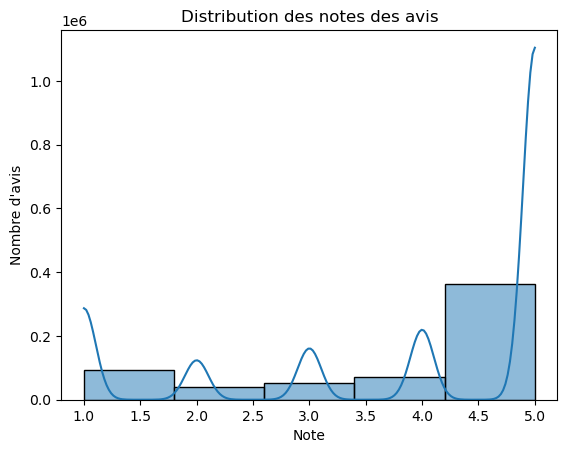

In [14]:
# 📈 Distribution des notes
sns.histplot(df["rating"], bins=5, kde=True, palette="mako")
plt.title("Distribution des notes des avis")
plt.xlabel("Note")
plt.ylabel("Nombre d'avis")
plt.show()


# Distribution des notes

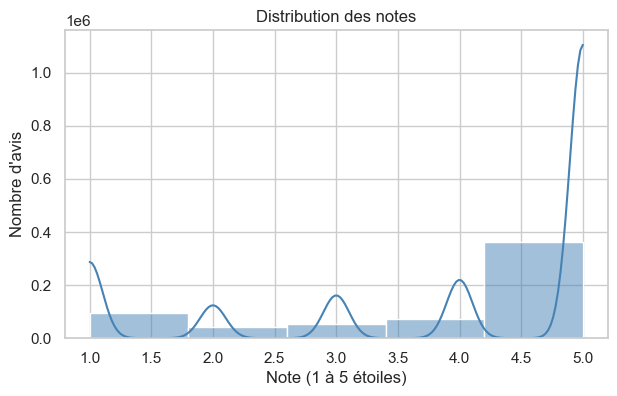

In [30]:
# Histogramme des notes données par les clients
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.histplot(df["rating"], bins=5, kde=True, color="steelblue")
plt.title("Distribution des notes")
plt.xlabel("Note (1 à 5 étoiles)")
plt.ylabel("Nombre d'avis")
plt.show()


# Nuage de mots des commentaires

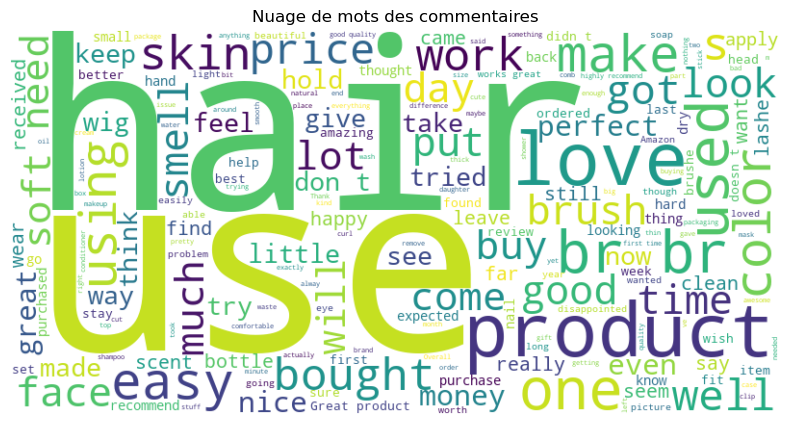

In [16]:

texte_total = " ".join(df["text"].astype(str))


wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texte_total)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots des commentaires")
plt.show()


# Zoom sur les commentaires négatifs

In [31]:
# Filtrer les avis très négatifs
avis_negatifs = df[df["sentiment"] < -0.3]
avis_negatifs["text"].head(5)


122    I've worn this for 3 days, I'm a little disapp...
177                     Not good for getting out tangles
291         Terrible quality. Did not even last 18hours.
295    It looks awkward when put on your head and it’...
312    I smell like furniture polish, it was piercing...
Name: text, dtype: object

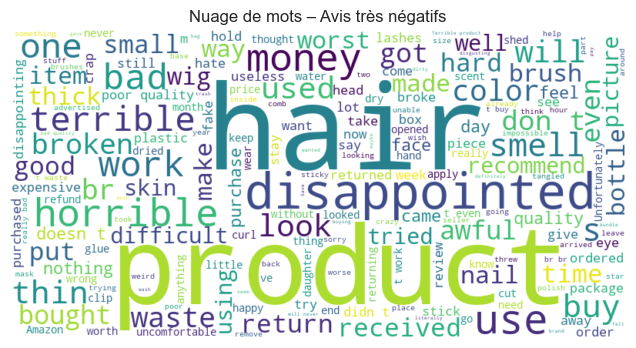

In [32]:
texte_negatif = " ".join(avis_negatifs["text"].astype(str))
wordcloud_negatif = WordCloud(width=800, height=400, background_color="white").generate(texte_negatif)

plt.figure(figsize=(10, 4))
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis("off")
plt.title("Nuage de mots – Avis très négatifs")
plt.show()


# Analyse de sentiment

In [21]:
sample_df = df.sample(n=500, random_state=42)  
sample_df["sentiment"] = sample_df["text"].apply(get_sentiment)


In [22]:
from tqdm.notebook import tqdm
tqdm.pandas()

df["sentiment"] = df["text"].progress_apply(get_sentiment)


  0%|          | 0/622643 [00:00<?, ?it/s]

In [23]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity


df["sentiment"] = df["text"].apply(get_sentiment)



# Visualisation des scores de sentiment

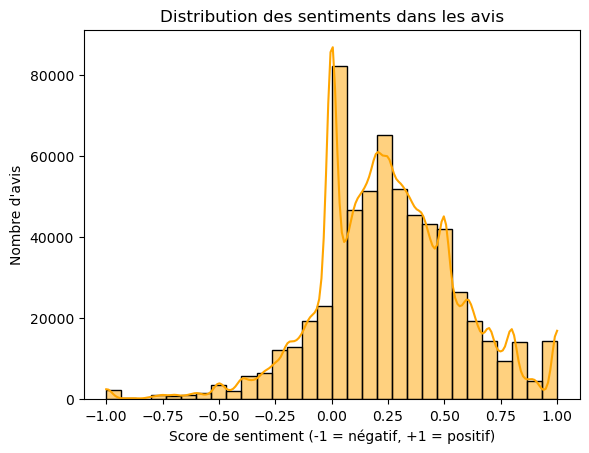

In [24]:

sns.histplot(df["sentiment"], bins=30, kde=True, color="orange")
plt.title("Distribution des sentiments dans les avis")
plt.xlabel("Score de sentiment (-1 = négatif, +1 = positif)")
plt.ylabel("Nombre d'avis")
plt.show()


# Synthèse des avis ( Statistiques descriptives)

In [25]:

print(f"Moyenne des notes : {df['rating'].mean():.2f}")
print(f"Moyenne du sentiment : {df['sentiment'].mean():.2f}")


pourcentage_verifies = df["verified_purchase"].mean() * 100
print(f"Avis avec achat vérifié : {pourcentage_verifies:.1f}%")


Moyenne des notes : 3.91
Moyenne du sentiment : 0.25
Avis avec achat vérifié : 89.8%


# Visualisation temporelle des avis

Cette section offre la possibilité d'observer l'évolution du nombre d'avis au fil du temps, ce qui est utile pour repérer les pics d'intérêt ou les moments moins fréquentés.

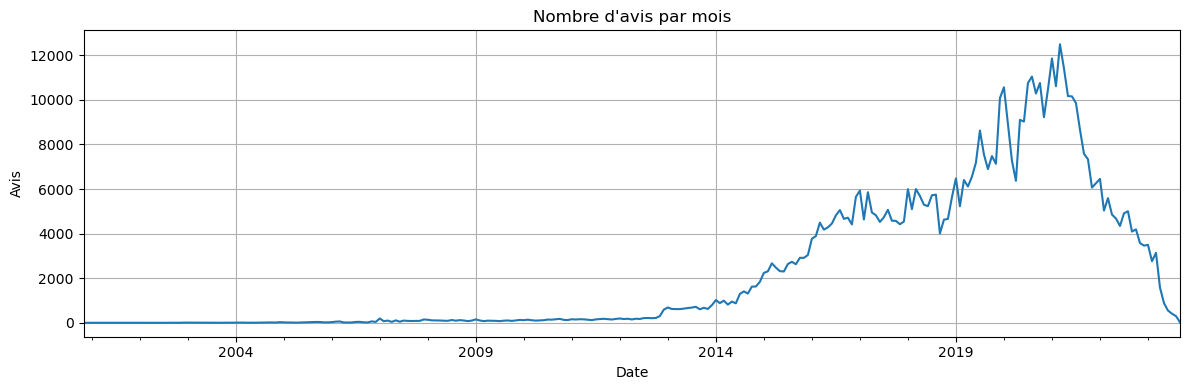

In [26]:

df["date"] = pd.to_datetime(df["timestamp"], unit="ms")


avis_par_mois = df.groupby(df["date"].dt.to_period("M")).size()

# 🧭 Affichage
plt.figure(figsize=(12, 4))
avis_par_mois.plot()
plt.title("Nombre d'avis par mois")
plt.xlabel("Date")
plt.ylabel("Avis")
plt.grid(True)
plt.tight_layout()
plt.show()


# Comparaison : achat vérifié vs non vérifié

Cette section compare les notes et les sentiments entre les clients ayant acheté le produit (achat vérifié) et ceux ne l’ayant pas fait. Cela permet de repérer d’éventuelles différences de perception ou de qualité.

In [27]:

df.groupby("verified_purchase")[["rating", "sentiment"]].mean()


,rating,sentiment
verified_purchase,,
False,4.063739,0.240914
True,3.895708,0.250661


VISUALISATION

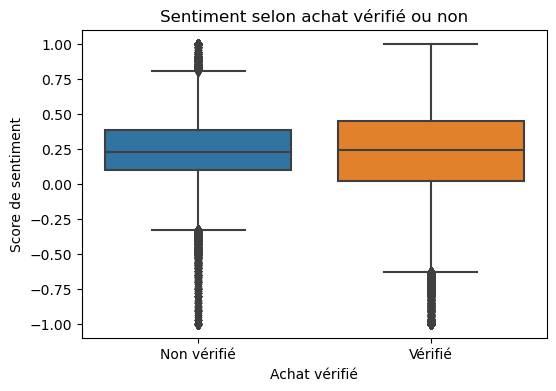

In [28]:

plt.figure(figsize=(6, 4))
sns.boxplot(x="verified_purchase", y="sentiment", data=df)
plt.title("Sentiment selon achat vérifié ou non")
plt.xlabel("Achat vérifié")
plt.ylabel("Score de sentiment")
plt.xticks([0,1], ["Non vérifié", "Vérifié"])
plt.show()


# Analyse par mots-clés thématiques (livraison, qualité, prix)

Cette partie identifie les sujets récurrents dans les commentaires, en dénombrant les occurrences de mots-clés stratégiques.  Il est très utile pour saisir les inquiétudes des clients.

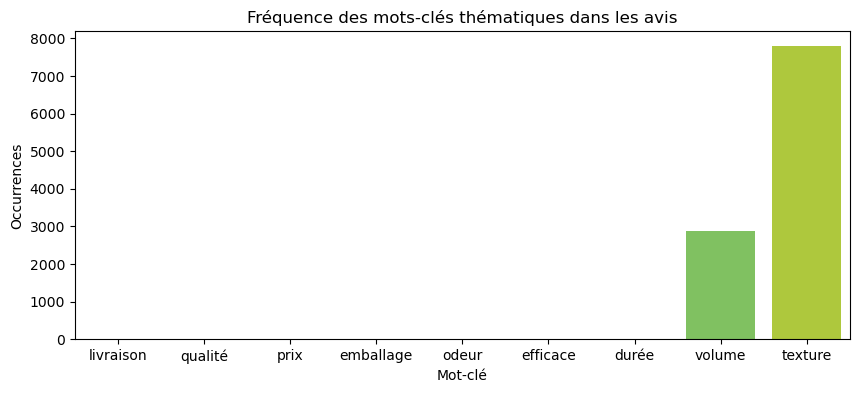

In [29]:
# 🧠 Liste des mots-clés 
themes = ["livraison", "qualité", "prix", "emballage", "odeur", "efficace", "durée", "volume", "texture"]
compteur = {}


for mot in themes:
    compteur[mot] = df["text"].str.lower().str.count(mot).sum()

# 📊 Visualisation 
plt.figure(figsize=(10, 4))
sns.barplot(x=list(compteur.keys()), y=list(compteur.values()), palette="viridis")
plt.title("Fréquence des mots-clés thématiques dans les avis")
plt.xlabel("Mot-clé")
plt.ylabel("Occurrences")
plt.show()
